## This notebook presents steps to estimate $ET_0$ using the FAO Penman-Monteith method (Allen, 1998). 
Author: M. Vremec, University of Graz, 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyet as pyet

### Import meteorological data

In [2]:
meteo = pd.read_csv("data/meteo_maribor_2017.csv", sep=";", parse_dates=True, index_col=0, dayfirst=True)
tmean = meteo.loc[:,"tmean [°C]"]
tmax = meteo.loc[:,"tmax [°C]"]
tmin = meteo.loc[:,"tmin [°C]"]
rh = meteo.loc[:,"rh [%]"]
rhmax = meteo.loc[:,"rhmax [%]"]
rhmin = meteo.loc[:,"rhmin [%]"]
wind = meteo.loc[:,"u_2 [ms-1]"]
Rs = meteo.loc[:,"Rs [MJm-2d-1]"]
et_mb = meteo.loc[:,"Evap [mm/d]"]
elevation = 279
lat = 46.5678 * np.pi / 180

### Penmam-Monteith

In [3]:
et_fao56 = pyet.pm_fao56(wind, Rs=Rs, elevation=elevation, lat=lat, tmax=tmax, tmin=tmin, rh=rh)
et_penman = pyet.penman(wind, Rs=Rs, elevation=elevation, lat=lat, tmax=tmax, tmin=tmin, rh=rh)
et_pm = pyet.pm(wind, Rs=Rs, elevation=elevation, lat=lat, tmax=tmax, tmin=tmin, rh=rh, rs=40)
et_pt = pyet.priestley_taylor(wind, Rs=Rs, elevation=elevation, lat=lat, tmax=tmax, tmin=tmin, rh=rh)
et_mak = pyet.makkink(Rs, tmax=tmax, tmin=tmin, elevation=elevation)
et_hamon = pyet.hamon(tmean.index, tmean, lat)
et_har = pyet.hargreaves(tmean.index, tmax, tmin, lat)
et_jh = pyet.jensen_haise(tmean, Rs)

### Plot results

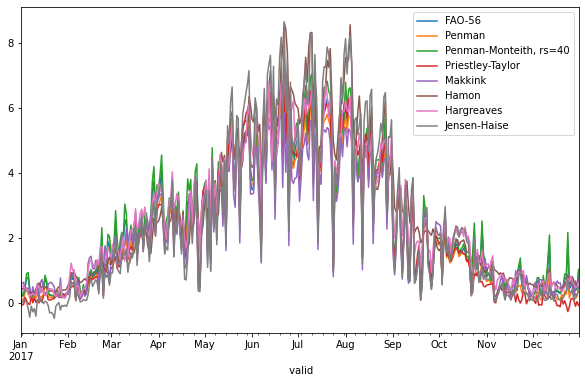

In [4]:
et_fao56.plot(figsize=(10,6), label="FAO-56")
et_penman.plot(label="Penman")
et_pm.plot(label="Penman-Monteith, rs=40")
et_pt.plot(label="Priestley-Taylor")
et_mak.plot(label="Makkink")
et_hamon.plot(label="Hamon")
et_har.plot(label="Hargreaves")
et_jh.plot(label="Jensen-Haise")
plt.legend()

In [32]:
wind = pd.Series([2.078], index=pd.DatetimeIndex(["2015-07-06"]))
tmax = pd.Series([21.5], index=pd.DatetimeIndex(["2015-07-06"]))
tmin = pd.Series([12.3], index=pd.DatetimeIndex(["2015-07-06"]))
rhmax = pd.Series([84], index=pd.DatetimeIndex(["2015-07-06"]))
rhmin = pd.Series([63], index=pd.DatetimeIndex(["2015-07-06"]))
Rs = pd.Series([22.07], index=pd.DatetimeIndex(["2015-07-06"]))
n = 9.25
nn = 16.1
elevation = 100
lat = 50.80 * np.pi / 180
et56 = pyet.pm_fao56(wind, elevation=elevation, lat=lat, Rs=Rs,
                                 tmax=tmax, tmin=tmin, rhmax=rhmax,
                                 rhmin=rhmin, n=n, nn=nn)

In [39]:
tmax = pd.Series([26.6], index=pd.DatetimeIndex(["2015-07-15"]))
tmin = pd.Series([14.8], index=pd.DatetimeIndex(["2015-07-15"]))
lat = 45.72 * np.pi / 180
pyet.hargreaves(tmax.index, tmax, tmin, lat)

2015-07-15    5.030674
dtype: float64

In [30]:
wind = pd.Series([2.078], index=pd.DatetimeIndex(["2015-07-06"]))
        tmax = pd.Series([21.5], index=pd.DatetimeIndex(["2015-07-06"]))
        tmin = pd.Series([12.3], index=pd.DatetimeIndex(["2015-07-06"]))
        rhmax = pd.Series([84], index=pd.DatetimeIndex(["2015-07-06"]))
        rhmin = pd.Series([63], index=pd.DatetimeIndex(["2015-07-06"]))
        Rs = pd.Series([22.07], index=pd.DatetimeIndex(["2015-07-06"]))
        n = 9.25
        nn = 16.1
        elevation = 100
        lat = 50.80 * np.pi / 180
        et56 = et.pm_fao56(wind, elevation=elevation, lat=lat, Rs=Rs,
                                 tmax=tmax, tmin=tmin, rhmax=rhmax,
                                 rhmin=rhmin, n=n, nn=nn)

3.5709743282039863

In [21]:
pd.to_datetime("2015-09-03")

AttributeError: 'Timestamp' object has no attribute 'index'